In [ ]:
# main_notebook.py
# =================
# Este script simula celdas de un notebook para ejecutar:
# 1) Carga de datos
# 2) Definición de VAE
# 3) Compilación y entrenamiento

# --- Cell 1: Imports
import tensorflow as tf
from  dataAcquisition_2 import get_data
from models.CVAE_2 import build_vae

# --- Cell 2: Carga y preprocesamiento de datos
# Ajusta val_split y mix_mode según necesites
x_train,y_train,x_test,y_test,original_dim = get_data()

x_train = x_train[:55000]
x_val   = x_train[55000:]
y_train = y_train[:55000]
y_val   = y_train[55000:]




In [2]:

from models.Encoder_2 import build_encoder
from models.Decoder_2 import build_decoder
encoder = build_encoder(latent_dim= 64)
decoder = build_decoder(latent_dim=64)


original_dim = 28 * 28  # para imágenes 28x28

vae = build_vae(encoder, decoder,x_train=x1_train,
                y_train=y1_train,x_val=x1_val,y_val=y1_val, beta=1.0)




Epoch 1/5


ValueError: Tried to convert 'x' to a tensor and failed. Error: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.ops`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [ ]:
'''
import matplotlib.pyplot as plt
import numpy as np

vae.fit(
    x=[x1_train, y1_train, y1_train],   # [imagen, cond_encoder, cond_decoder]
    y=x1_train,                         # target
    validation_data=([x1_val, y1_val, y1_val], x1_val ),
    epochs=1,
    batch_size=5
)
'''
img = np.expand_dims(x1_train[0], axis=0)
cond = np.expand_dims(y1_train[0], axis=0)
salida = vae.predict([img, cond,cond ])
reconstruccion = salida[0].reshape(28, 28)

plt.imshow(x1_train[0], cmap='gray')
plt.show()
plt.imshow(reconstruccion, cmap='gray')
plt.show()

ValueError: Tried to convert 'x' to a tensor and failed. Error: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.ops`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


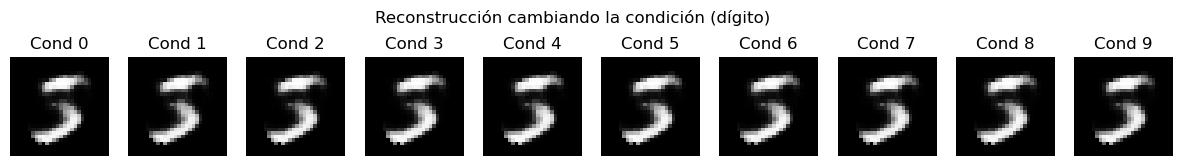

In [ ]:
# Selecciona una imagen de prueba
import numpy as np
import matplotlib.pyplot as plt
img = np.expand_dims(x1_train[0], axis=0)

plt.figure(figsize=(15, 2))
for i in range(10):
    # Crea la condición one-hot para el dígito i
    cond = np.zeros((1, 10))
    cond[0, i] = 1

    # Predice usando la misma condición para encoder y decoder
    salida = vae.predict([img, cond,cond])
    reconstruccion = salida[0].reshape(28, 28)

    plt.subplot(1, 10, i + 1)
    plt.imshow(reconstruccion, cmap='gray')
    plt.title(f"Cond {i}")
    plt.axis('off')

plt.suptitle("Reconstrucción cambiando la condición (dígito)")
plt.show()

In [ ]:
from models.predictor_2 import build_predictor_model
from tensorflow.keras.optimizers import Adam

predictor = build_predictor_model()

predictor.compile(Adam(1e-3), loss="categorical_crossentropy")

predictor.fit(
    x=x1_train,
    y=y1_train,
    batch_size=128,
    epochs=5,
    validation_data=(x1_val, y1_val)  # Include validation data
#    callbacks=[cp_callback_predictor_C2, early_stopping]  # Add early_stopping to callbacks
)

Epoch 1/5


ValueError: Input 0 of layer "predictor_C2" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28)